In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_csv("AAPL.csv", index_col=0, parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400


In [4]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-27 to 2021-01-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,98.720781,100.196492,97.277569,98.801778,98.540516,1.444898e+08
std,23.203103,23.309938,22.798247,23.051128,23.194544,7.905464e+07
min,57.020000,57.125000,53.152500,56.092499,55.744217,2.225040e+07
25%,78.757500,79.677498,77.727501,78.739998,78.462914,9.435980e+07
50%,96.997498,98.500000,96.062500,97.057503,96.715965,1.295540e+08
75%,118.330002,119.629997,116.440002,118.275002,118.071297,1.808603e+08
max,143.600006,145.089996,141.369995,142.919998,142.919998,4.268848e+08


In [7]:
data['Daily chg'] = data['Close'] - data['Open']

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily chg
Date,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000,-0.277496
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000,1.272499
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200,-0.027504
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200,0.832497
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400,-2.854996


In [9]:
data['Normalized'] = data['Close'] / data['Close'].iloc[0]
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily chg,Normalized
Date,,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000,-0.277496,1.000000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000,1.272499,1.028289
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200,-0.027504,1.049814
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200,0.832497,1.048293
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400,-2.854996,1.001813


<IPython.core.display.Javascript object>


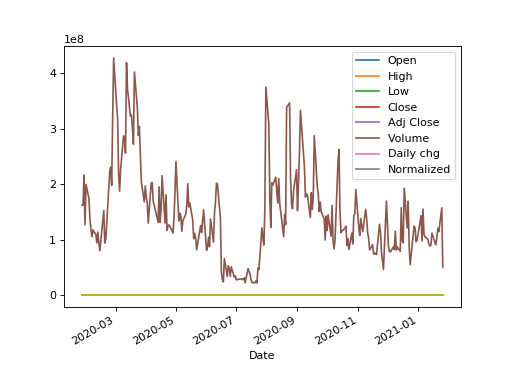

In [10]:
data.plot()

In [11]:
data['Close'].plot()

<IPython.core.display.Javascript object>


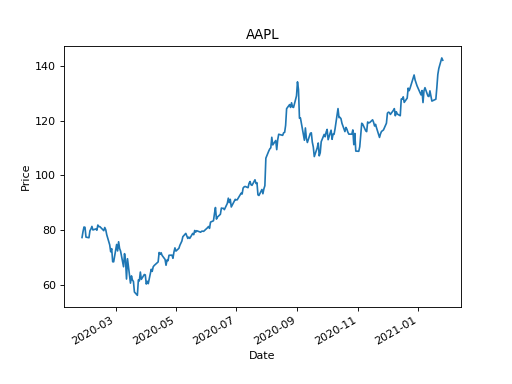

Text(0.5, 1.0, 'AAPL')

In [12]:
fig, ax = plt.subplots()
data['Close'].plot(ax=ax)
ax.set_ylabel("Price")
ax.set_title("AAPL")

<IPython.core.display.Javascript object>


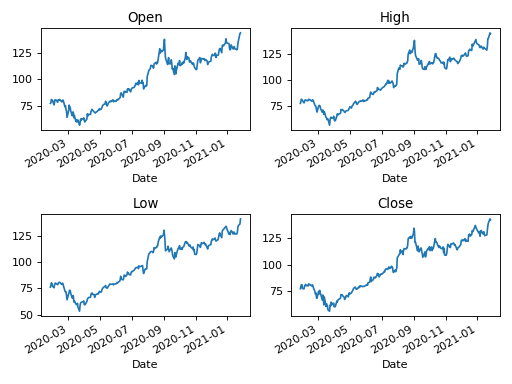

In [13]:
fig, ax = plt.subplots(2, 2)
data['Open'].plot(ax=ax[0, 0], title="Open")
data['High'].plot(ax=ax[0, 1], title="High")
data['Low'].plot(ax=ax[1, 0], title="Low")
data['Close'].plot(ax=ax[1, 1], title="Close")
plt.tight_layout()

import sys
!{sys.executable} -m pip install pandas-datareader

import pandas_datareader as pdt
import datetime as dt

ticker = "AAPL"
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2020, 12, 31)

data = pdt.get_data_yahoo(ticker, start, end)

data.head()

### Calculating

- Pct change
- Log returns
- Standard deviation (Volatility)
- Rolling
    - Simple Moving Avarage
    - Exponential Moving Average
    
### Standard deviation

- $\sigma_{p} = \sigma_{daily}\times \sqrt{p}$
- $\sigma_{annually} = \sigma_{daily}\times \sqrt{252}$
 
    *(252 trading days per year)*

In [14]:
data['%-chg'] = data['Close'].pct_change()

In [17]:
data['Log returns'] = np.log(data['Close']/data['Close'].shift())

In [18]:
volatility = data['Log returns'].std()*252**.5
str_vol = str(round(volatility, 4)*100)

<IPython.core.display.Javascript object>


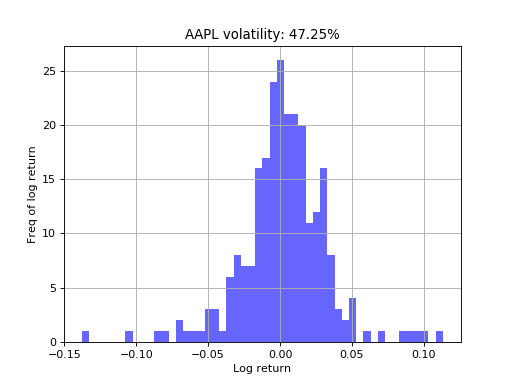

Text(0.5, 1.0, 'AAPL volatility: 47.25%')

In [19]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("AAPL volatility: " + str_vol + "%")

In [20]:
data['MA10'] = data['Close'].rolling(10).mean()

In [21]:
data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()

In [24]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily chg,Normalized,%-chg,Log returns,MA10,EMA10,MACD,Signal line
Date,,,,,,,,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000,-0.277496,1.000000,NaN,NaN,NaN,77.237503,0.000000,0.000000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000,1.272499,1.028289,0.028289,0.027897,NaN,77.634775,0.174302,0.034860
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200,-0.027504,1.049814,0.020932,0.020716,NaN,78.262089,0.441498,0.116188
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200,0.832497,1.048293,-0.001449,-0.001450,NaN,78.753982,0.636435,0.220237
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400,-2.854996,1.001813,-0.044339,-0.045352,NaN,78.503713,0.495529,0.275295


<IPython.core.display.Javascript object>


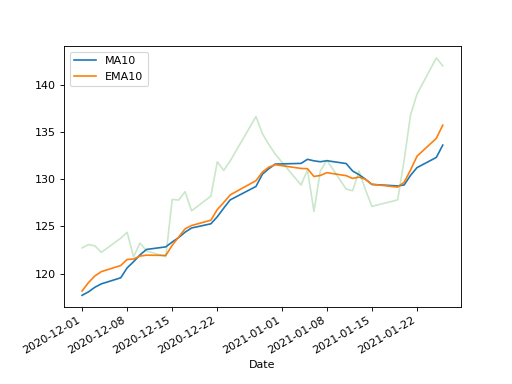

In [22]:
fig, ax = plt.subplots()
data[['MA10', 'EMA10']].loc['2020-12-01':].plot(ax=ax)
data['Close'].loc['2020-12-01':].plot(ax=ax, alpha=0.25)

### MACD
- MACD is a lagging indicator when trading on the crossovers
- https://www.investopedia.com/terms/m/macd.asp

**Calculation** (12-26-9 MACD (default))
- MACD=12-Period EMA − 26-Period EMA
- Singal line 9-Perioed EMA of MACD

In [23]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()

<IPython.core.display.Javascript object>


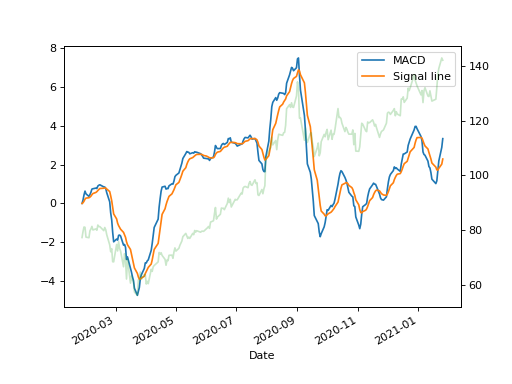

In [25]:
fig, ax = plt.subplots()
data[['MACD', 'Signal line']].plot(ax=ax)
data['Close'].plot(ax=ax, alpha=0.25, secondary_y=True)

### Stochastic oscillator
- Lagging indicator
- https://www.investopedia.com/terms/s/stochasticoscillator.asp

**Calculations**
- 14-high: Maximum of last 14 trading days
- 14-low: Minimum of last 14 trading days
- %K: (Last close - 14-low)*100 / (14-high - 14-low)
- %D: Simple Moving Average of %K

In [26]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14)*100/(high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

In [27]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily chg,Normalized,%-chg,Log returns,MA10,EMA10,MACD,Signal line,%K,%D
Date,,,,,,,,,,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000,-0.277496,1.000000,NaN,NaN,NaN,77.237503,0.000000,0.000000,NaN,NaN
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000,1.272499,1.028289,0.028289,0.027897,NaN,77.634775,0.174302,0.034860,NaN,NaN
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200,-0.027504,1.049814,0.020932,0.020716,NaN,78.262089,0.441498,0.116188,NaN,NaN
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200,0.832497,1.048293,-0.001449,-0.001450,NaN,78.753982,0.636435,0.220237,NaN,NaN
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400,-2.854996,1.001813,-0.044339,-0.045352,NaN,78.503713,0.495529,0.275295,NaN,NaN


<IPython.core.display.Javascript object>


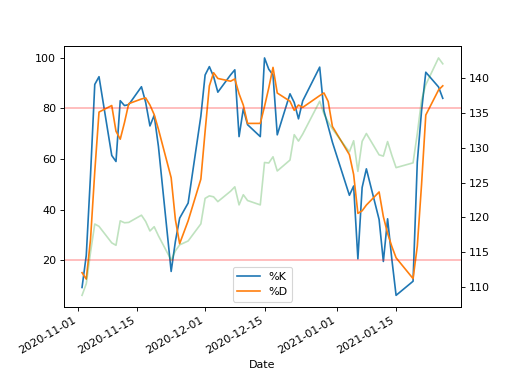

In [28]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2020-11-01':].plot(ax=ax)
ax.axhline(80, c='r', alpha=0.3)
ax.axhline(20, c='r', alpha=0.3)
data['Close'].loc['2020-11-01':].plot(ax=ax, alpha=0.3, secondary_y=True)

In [ ]:
writer = pd.ExcelWriter("technical.xlsx", 
                        engine='xlsxwriter', 
                        date_format = 'yyyy-mm-dd', 
                        datetime_format='yyyy-mm-dd')

workbook = writer.book

# Create a format for a green cell
green_cell = workbook.add_format({
    'bg_color': '#C6EFCE',
    'font_color': '#006100'
})

# Create a format for a red cell
red_cell = workbook.add_format({
    'bg_color': '#FFC7CE',                            
    'font_color': '#9C0006'
})

# **
# ** MA
# **
sheet_name = 'MA10'
data[['Close', 'MA10']].to_excel(writer, sheet_name=sheet_name)
worksheet = writer.sheets[sheet_name]

# Set column width of Date
worksheet.set_column(0, 0, 15)


for col in range(1, 3):
    # Create a conditional formatted of type formula
    worksheet.conditional_format(1, col, len(data), col, {
        'type': 'formula',                                    
        'criteria': '=B2>=C2',
        'format': green_cell
    })

    # Create a conditional formatted of type formula
    worksheet.conditional_format(1, col, len(data), col, {
        'type': 'formula',                                    
        'criteria': '=B2<C2',
        'format': red_cell
    })


# Create a new chart object.
chart1 = workbook.add_chart({'type': 'line'})

# Add a series to the chart.
chart1.add_series({
        'name': 'AAPL',
        'categories': [sheet_name, 1, 0, len(data), 0],
        'values': [sheet_name, 1, 1, len(data), 1],
})

# Create a new chart object.
chart2 = workbook.add_chart({'type': 'line'})

# Add a series to the chart.
chart2.add_series({
        'name': sheet_name,
        'categories': [sheet_name, 1, 0, len(data), 0],
        'values': [sheet_name, 1, 2, len(data), 2],
})

# Combine and insert title, axis names
chart1.combine(chart2)
chart1.set_title({'name': sheet_name + " AAPL"})
chart1.set_x_axis({'name': 'Date'})
chart1.set_y_axis({'name': 'Price'})

# Insert the chart into the worksheet.
worksheet.insert_chart('E2', chart1)


# **
# ** MACD
# **

sheet_name = 'MACD'
data[['Close', 'MACD', 'Signal line']].to_excel(writer, sheet_name=sheet_name)
worksheet = writer.sheets[sheet_name]

# Set column width of Date
worksheet.set_column(0, 0, 15)

for col in range(1, 4):
    # Create a conditional formatted of type formula
    worksheet.conditional_format(1, col, len(data), col, {
        'type': 'formula',                                    
        'criteria': '=C2>=D2',
        'format': green_cell
    })

    # Create a conditional formatted of type formula
    worksheet.conditional_format(1, col, len(data), col, {
        'type': 'formula',                                    
        'criteria': '=C2<D2',
        'format': red_cell
    })

# Create a new chart object.
chart1 = workbook.add_chart({'type': 'line'})

# Add a series to the chart.
chart1.add_series({
        'name': 'MACD',
        'categories': [sheet_name, 1, 0, len(data), 0],
        'values': [sheet_name, 1, 2, len(data), 2],
})

# Create a new chart object.
chart2 = workbook.add_chart({'type': 'line'})

# Add a series to the chart.
chart2.add_series({
        'name': 'Signal line',
        'categories': [sheet_name, 1, 0, len(data), 0],
        'values': [sheet_name, 1, 3, len(data), 3],
})

# Combine and insert title, axis names
chart1.combine(chart2)
chart1.set_title({'name': sheet_name + " AAPL"})
chart1.set_x_axis({'name': 'Date'})
chart1.set_y_axis({'name': 'Value'})

# To set the labels on x axis not on 0
chart1.set_x_axis({
    'label_position': 'low',
    'num_font':  {'rotation': 45}
})

# Insert the chart into the worksheet.
worksheet.insert_chart('F2', chart1)


# **
# ** Stochastic
# **

sheet_name = 'Stochastic'
data[['Close', '%K', '%D']].to_excel(writer, sheet_name=sheet_name)
worksheet = writer.sheets[sheet_name]

# Set column width of Date
worksheet.set_column(0, 0, 15)

for col in range(1, 4):
    # Create a conditional formatted of type formula
    worksheet.conditional_format(1, col, len(data), col, {
        'type': 'formula',                                    
        'criteria': '=C2>=D2',
        'format': green_cell
    })

    # Create a conditional formatted of type formula
    worksheet.conditional_format(1, col, len(data), col, {
        'type': 'formula',                                    
        'criteria': '=C2<D2',
        'format': red_cell
    })


# Create a new chart object.
chart1 = workbook.add_chart({'type': 'line'})

# Add a series to the chart.
chart1.add_series({
        'name': '%K',
        'categories': [sheet_name, 1, 0, len(data), 0],
        'values': [sheet_name, 1, 2, len(data), 2],
})

# Create a new chart object.
chart2 = workbook.add_chart({'type': 'line'})

# Add a series to the chart.
chart2.add_series({
        'name': '%D',
        'categories': [sheet_name, 1, 0, len(data), 0],
        'values': [sheet_name, 1, 3, len(data), 3],
})

# Combine and insert title, axis names
chart1.combine(chart2)
chart1.set_title({'name': sheet_name + " AAPL"})
chart1.set_x_axis({'name': 'Date'})
chart1.set_y_axis({'name': 'Value'})

# To set the labels on x axis not on 0
chart1.set_x_axis({
    'label_position': 'low',
    'num_font':  {'rotation': 45}
})

# Insert the chart into the worksheet.
worksheet.insert_chart('F2', chart1)

# End of sheets


# Close
writer.close()